# Austin B-cycle Data Analysis

### Introduction 

We are analyzing the bike sharing data from the Austin B-Cycle program from December 2013 to July 2018. The analysis looks to draw trends related to the demand of the service.  

* The first part of the analysis will look at the demand by year, month, day, and hour. 

* The second part will rank stations and membership. 

* The last part will look at the unique and temporary Austin B-cycle population peeks such as SXSW, ACL, and Uber Ban for (May 9, 2016 - May 29, 2017).  


### Purpose: 

This analysis helps the enterprise to increase the profit by increasing the availability of the bikes at the most popular stations during the most popular times. This would help the company determine when the best time is to make bike repairs, when to order new bicycles, and when to store extra backup bicycles. 
This also helps the customers to select the most price worthy membership. 

### Scope: 


Data is only from December 2013 through July 2018. 


### Observable Trends 

* Demand for the service continues to increase with the current year having the most users. 
* The most popular month is March due to SXSW. 
* The most popular hour is 5 p.m. 
* Busiest day of the week is Saturday. 
* Most popular station: Speedway & 21st by PCL
* Most popular membership type: Walk up 
* Walk up memberships riders that the longest trip durations
* Austin’s bike share system surpasses previous overall use record from 2015. 2018 saw a nearly 50% increase in bike share usage compared to 2017 and set an overall system record for the festival


##  Dependencies and CSV

The depencies include google maps. Install in terminal with the following command: 

> pip install gmaps


In [1]:
# Include graphs next to code
%matplotlib inline

In [2]:
# To install gmaps in library within the notebook, uncomment the following command
#!pip install gmaps


In [3]:
# Dependencies
import requests
import json
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import gmaps


# Ignore Warnings as we are rewrititng values 
import warnings
warnings.filterwarnings('ignore')



# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key= gkey)

In [4]:
# reading the csv file using pandas and creating a dataframe 
df_bike_cl = pd.read_csv("Clean_Data/out.csv")
# displaying the top rows of the dataframe 
df_bike_cl.head(1)

,Bicycle ID,Checkout Date,Checkout Station,Checkout Station ID,Checkout Time,Membership Type,Trip Month,Return Station,Return Station ID,Trip Duration Minutes,Trip ID,Trip Year,Trip Date,Trip Day of Week,Trip Hour
0,207.0,2014-10-26,West & 6th St.,2537.0,13:12:00,year,10,Rainey St @ Cummings,2707.0,76,9900285854,2014,26,Sunday,13


##  I. Austin B-Cycle Utilization

### Yearly Count

   Year  Total Number of Rides 
0  2013                    1457
1  2014                  155415
2  2015                  184207
3  2016                  184505
4  2017                  193488
5  2018                  271410


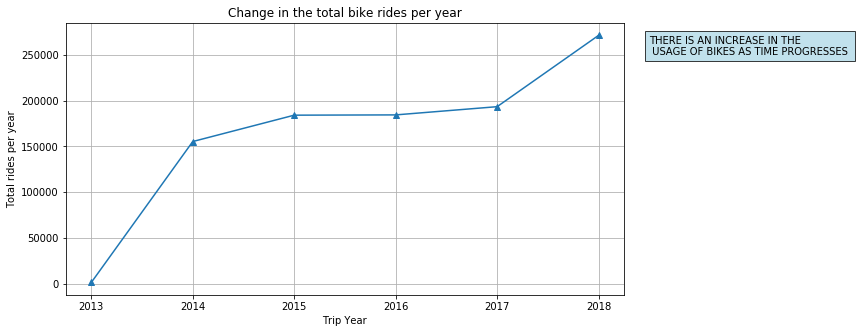

In [5]:
# For the Year by Year breakdown, we are basing the analysis on the attributes Trip Year and Trip ID. 
# Get the total number of rides by calcualting the count of trip Id's grouped by Trip Year and save the results in a dataframe 
# plot using X-Axis as Trip Year and Y-Axis as Total rides with markers indicating Total rides for that year

df_bike_year = df_bike_cl.groupby('Trip Year')
number_of_rides_per_year = df_bike_year['Trip ID'].count()
rides_per_year_df = pd.DataFrame(data = number_of_rides_per_year,index = None).reset_index()
rides_per_year_df = rides_per_year_df.rename(columns = {"Trip Year":"Year","Trip ID":"Total Number of Rides "})
print(rides_per_year_df)
# Plot the total number of rides per year using line graph
Total_rides_per_year_chart = number_of_rides_per_year.plot(kind = "line",grid=True,marker='^',title = "Change in the total bike rides per year",figsize = (10,5))                                                                                                             
Total_rides_per_year_chart.set_xlabel("Trip Year")
Total_rides_per_year_chart.set_ylabel("Total rides per year")
plt.text(2018.5,250000,"THERE IS AN INCREASE IN THE \n USAGE OF BIKES AS TIME PROGRESSES ",bbox=dict(facecolor='lightblue',alpha =0.75))
plt.savefig("Images/Rides_per_Year.png",bbox_inches = "tight")
plt.show()

###  Monthly count

3     111774
10     90177
5      69564
7      61475
6      60186
9      57748
4      53314
11     52268
8      49125
1      43736
2      42018
12     26230
Name: Trip Month, dtype: int64


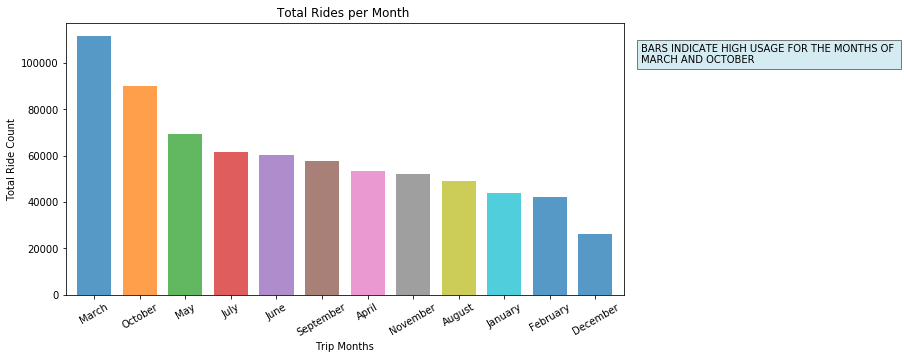

In [6]:
# For the Month by Month breakdown, Analysis is based on Trip Month and leveraging Pandas Value_Counts functionality  
# Years 2013 and 2018 are excluded for this section, since only partial data is available and can skew the results.

df_month = df_bike_cl.loc[(df_bike_cl["Trip Year"] >= 2014) & (df_bike_cl["Trip Year"] <= 2017),:]
df_bike_month = df_month['Trip Month'].value_counts()
print(df_bike_month)

# plot the graph with months on X-axis and total number of rides on Y-axis
# For a clear presentation, we are importing python library Calendar to convert from month index to a month name
import calendar
mn=[calendar.month_name[int(x)] for x in df_bike_month.index.values.tolist()]
bike_chart = df_bike_month.plot.bar(title = "Total Rides per Month ",width = 0.75,figsize = (10,5),rot = 30,alpha = 0.75 )
bike_chart.set_xticklabels(mn)
bike_chart.set_xlabel("Trip Months")
bike_chart.set_ylabel("Total Ride Count")
plt.text(12,100000,"BARS INDICATE HIGH USAGE FOR THE MONTHS OF \nMARCH AND OCTOBER",bbox=dict(facecolor='lightblue',alpha =0.5))
plt.savefig("Images/Rides_per_Month.png")
plt.show()




###  Daily Count

Saturday     196583
Sunday       162296
Friday       154650
Monday       125486
Thursday     124186
Wednesday    114329
Tuesday      112952
Name: Trip Day of Week, dtype: int64


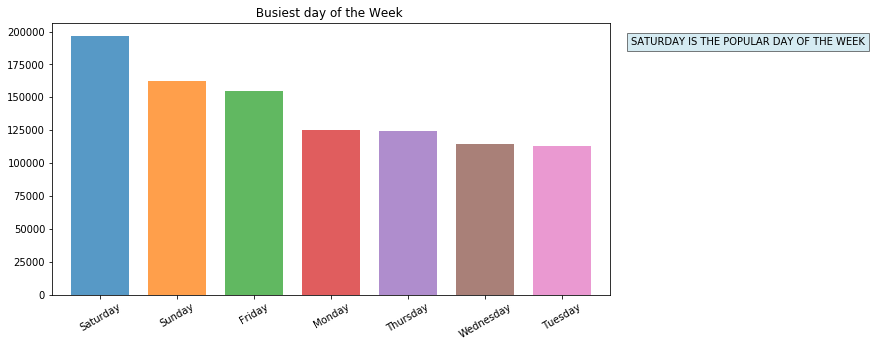

In [7]:
# For this section of the analysis, Data is being sliced by day of the week to find out the most popular day.
# Checkout Day is the attribute from base data that is used to extract day of the week. 
busy_day = df_bike_cl['Trip Day of Week'].value_counts()
print(busy_day)

# Analysis is plotted with Day of the Week on X-axis and Total rides per day on Y-axis.
plt.xlabel = "Days of a week "
plt.ylabel = "Ride count"
week_chart = busy_day.plot(kind = "bar" , title = " Busiest day of the Week  ",width = 0.75,figsize = (10,5),rot = 30,alpha = 0.75)
plt.text(6.9,190000,"SATURDAY IS THE POPULAR DAY OF THE WEEK",bbox=dict(facecolor='lightblue',alpha =0.5))
plt.savefig("Images/Busy_Week.png",bbox_inches = "tight")
plt.show()

### Hourly Count

17    84076
16    83470
15    83337
13    82408
14    81684
12    76837
18    71035
11    63669
19    56549
10    48313
20    43194
9     39589
21    35189
8     33557
22    27511
23    18739
7     16761
0     13662
1     10068
2      8794
6      5704
3      2820
5      1955
4      1561
Name: Trip Hour, dtype: int64


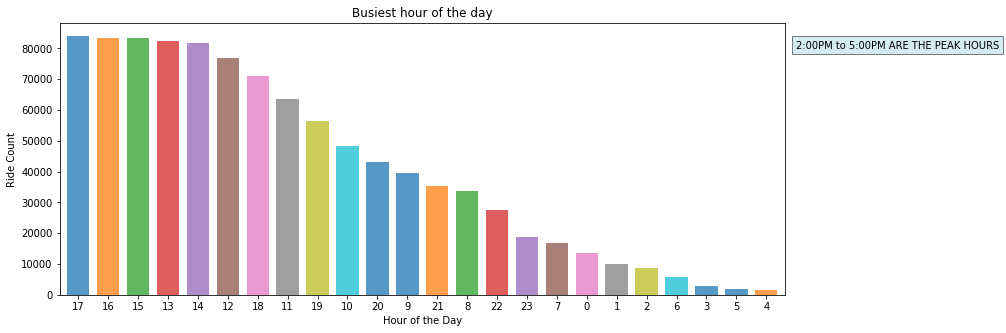

In [8]:
# To get best hour of the day , pandas value_counts() function is used,
# which takes unique values from Trip hour column  and counts the corresponding Trip ID'S
busy_hour = df_bike_cl['Trip Hour'].value_counts()
print(busy_hour)
# plot the graph using Trip Hour on x_axis and Total ride count on Y_axis
hour_chart = busy_hour.plot(kind = "bar" , title = "Busiest hour of the day",width = 0.75,figsize = (13,5),rot = 0,alpha = 0.75)
hour_chart.set_xlabel("Hour of the Day")
hour_chart.set_ylabel("Ride Count")
plt.text(24,80000,"2:00PM to 5:00PM ARE THE PEAK HOURS",bbox=dict(facecolor='Lightblue',alpha =0.5))
plt.savefig("Images/Busy_Hour.png",bbox_inches="tight")
plt.show()

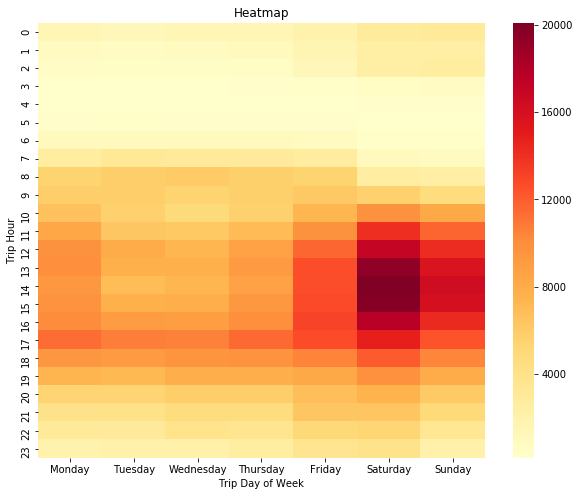

In [9]:
days_arr = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_day_of_week(x):
    return days_arr[x.weekday()]




df_heat = df_bike_cl.groupby(["Trip Hour", "Trip Day of Week"])["Trip ID"].size().reset_index()
df_heat2 = df_heat.pivot("Trip Hour", "Trip Day of Week", "Trip ID")
fig, ax = plt.subplots(figsize=(10,8))       
sns.heatmap(df_heat2[days_arr] , cmap="YlOrRd")

plt.title("Heatmap")
plt.savefig("Images/Hours-day.png")
plt.show()

## II.  Membership and Station Demand


In case the google map is not displaying in the jupyter notebook try the command below in terminal to enable gmaps. 
>jupyter nbextension enable --py gmaps

### Station Demand (by location)

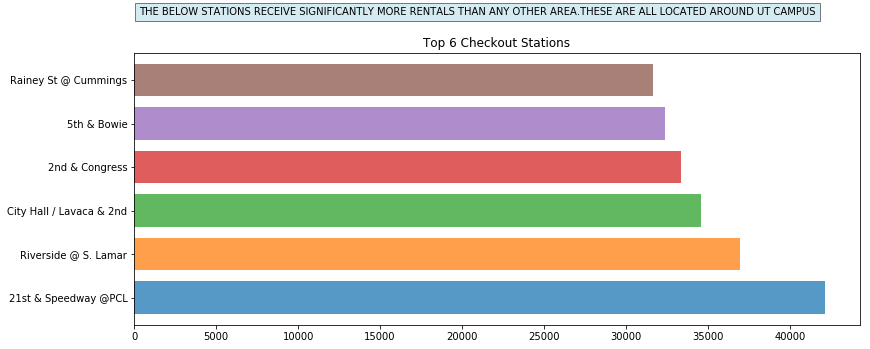

In [10]:
# The focus of this analysis, is bike usage by check out station
# Again, value_counts() is leveraged to find unique row count by Check out station
popular_checkout_station = df_bike_cl['Checkout Station'].value_counts()
popular_checkout_station.sort_values(ascending = False).head(6)

# Plot covers the top 6 check out stations that potray more usage than other stations
pop_station_chart = popular_checkout_station[0:6].plot(kind = "barh",width = 0.75,figsize = (13,5),alpha = 0.75)
plt.title("Top 6 Checkout Stations")
plt.text(300,6.5,"THE BELOW STATIONS RECEIVE SIGNIFICANTLY MORE RENTALS THAN ANY OTHER AREA.THESE ARE ALL LOCATED AROUND UT CAMPUS",bbox=dict(facecolor='Lightblue',alpha =0.5) )
plt.savefig("Images/Pop_Station.png",bbox_inches = "tight")
plt.show()

In [11]:
b_cycle_stations = [
   {'name': '21st & Speedway @PCL ', 'location': (30.283, -97.7375)},
   {'name': 'Riverside @ S. Lamar', 'location': (30.26446, -97.75665)},
   {'name': 'City Hall / Lavaca & 2nd', 'location': (30.26476, -97.74678)},
   {'name': '2nd & Congress', 'location': (30.26408, -97.74355)},
   {'name': '5th & Bowie', 'location': (30.2696, -97.75332)},
   {'name': 'Rainey St @ Cummings', 'location': (30.25579, -97.73982)}
]
station_locations = [station['location'] for station in b_cycle_stations]
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
</dl>
"""

station_info = [info_box_template.format(**station) for station in b_cycle_stations]
marker_layer = gmaps.marker_layer(station_locations, info_box_content=station_info)
fig = gmaps.figure()
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))

###  Membership Demand (by category)


walk up    374340
year       216566
student    161804
day        125192
month       55605
weekend     44780
3 year       6319
week         5876
Name: Membership Type, dtype: int64


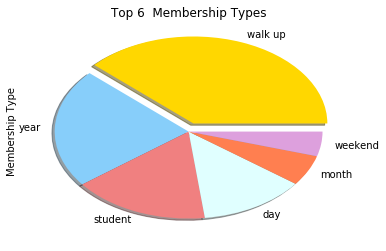

In [12]:
# Analysis by Membership Types helps determine which programs are popular. 
# A note, Membership types have been changing over the years. Membership types are categorized to negate this effect on data.
popular_membership_type = df_bike_cl['Membership Type'].value_counts() 
print(popular_membership_type.head(10))

# plot the graph for the popular mebership types 
explode = (0.1,0,0,0,0,0)
colors = ["gold", "lightskyblue", "lightcoral","lightcyan","coral","plum"]
popular_membership_type[0:6].plot.pie(colors = colors , explode = explode, shadow=True)
plt.title("Top 6  Membership Types")
plt.savefig("Images/mem_type.png",bbox_inches = "tight")
plt.show()

### Average Trip Duration (by Membership Category)

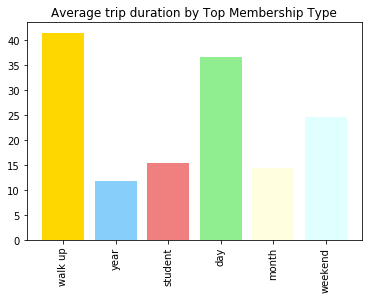

In [13]:
# 2013 - 2018 is being considered for this analysis
# Group by membership type and sort, to find out the top 6 membership types
# For each membership type in the Top 6, prepare a data series with trip durations
# Find the average for each membership type
# Data is illustrated as a bar chart. Top 6 are accounted for 100%, and the division indicate percentage by membership type


from matplotlib import pyplot, pylab
subscriber_type = df_bike_cl['Membership Type'].value_counts().index
top_subscriber_type = subscriber_type[0:6]

trip_minutes = []
for element in top_subscriber_type:
   time_min = df_bike_cl[df_bike_cl['Membership Type'] == element]['Trip Duration Minutes'].values
   trip_minutes.append(np.mean(time_min))

x_axis  =  np.arange(0, len(top_subscriber_type))
tick_locations = []
for x in x_axis:
   tick_locations.append(x)

plt.xticks(tick_locations, top_subscriber_type, rotation=90)
labels = ["walk up","year","student","day","month","weekend"]
explode = (0.1,0,0,0,0,0)
colors = ["gold", "lightskyblue", "lightcoral","lightgreen","lightyellow","lightcyan"]
plt.bar(height= trip_minutes, x= tick_locations, color=colors)
plt.title('Average trip duration by Top Membership Type')
plt.savefig("Images/avg_duration_mem_type.png",bbox_inches = "tight")
plt.show()

### Average Trip Duration Over the Years (by Membership Category)

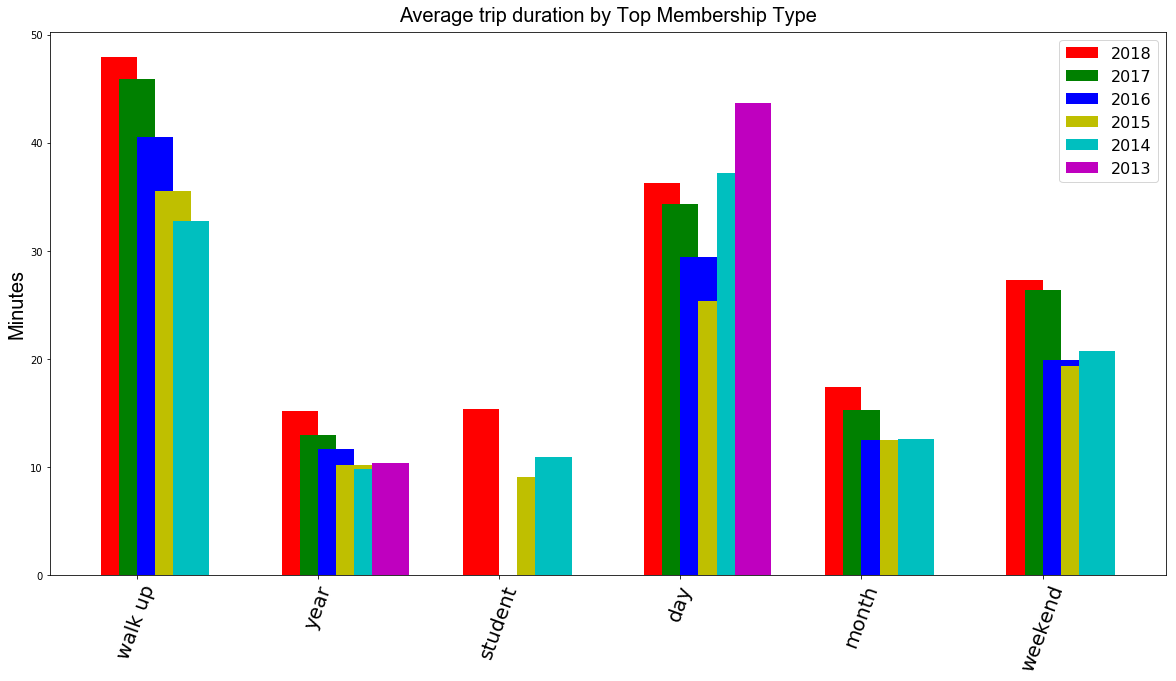

In [14]:
# Analyzing Membership type usage variation by year. 
# For each year, filter the data into a data frame.
# For that data frame, for the above selected top 6 membership types 
# calculate the average duration of trips
# Plot with membership types on X-axis and Minutes on Y-axis and stacked by year.

fig, ax = plt.subplots(figsize=(20, 10))
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'20'}
w = 0.2
subscriber_type = df_bike_cl['Membership Type'].value_counts().index
top_subscriber_type = subscriber_type[0:6]

## For 2018
df_bike_2018 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2018)]

trip_minutes_2018 = []
for element in top_subscriber_type:
   time_min = df_bike_2018[df_bike_2018['Membership Type'] == element]['Trip Duration Minutes'].values
   trip_minutes_2018.append(np.mean(time_min))

## For 2017

df_bike_2017 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2017)]

trip_minutes_2017 = []
for element in top_subscriber_type:
   time_min = df_bike_2017[df_bike_2017['Membership Type'] == element]['Trip Duration Minutes'].values
   trip_minutes_2017.append(np.mean(time_min))

## For 2016

df_bike_2016 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2016)]

trip_minutes_2016 = []
for element in top_subscriber_type:
   time_min = df_bike_2016[df_bike_2016['Membership Type'] == element]['Trip Duration Minutes'].values
   trip_minutes_2016.append(np.mean(time_min))

## For 2015

df_bike_2015 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2015)]

trip_minutes_2015 = []
for element in top_subscriber_type:
   time_min = df_bike_2015[df_bike_2015['Membership Type'] == element]['Trip Duration Minutes'].values
   trip_minutes_2015.append(np.mean(time_min))


## For 2014

df_bike_2014 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2014)]

trip_minutes_2014 = []
for element in top_subscriber_type:
   time_min = df_bike_2014[df_bike_2014['Membership Type'] == element]['Trip Duration Minutes'].values
   trip_minutes_2014.append(np.mean(time_min))

## For 2013

df_bike_2013 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2013)]

trip_minutes_2013 = []
for element in top_subscriber_type:
   time_min = df_bike_2013[df_bike_2013['Membership Type'] == element]['Trip Duration Minutes'].values
   trip_minutes_2013.append(np.mean(time_min))

x_axis  =  np.arange(0, len(top_subscriber_type))
tick_locations = []
for x in x_axis:
   tick_locations.append(x)

plt.setp(ax, xticks= tick_locations, xticklabels= top_subscriber_type)
plt.setp(ax.get_xticklabels(), rotation=70, fontsize= 20)
ax.bar(x_axis-0.5*w, trip_minutes_2018,w,color='r',label='2018')
ax.bar(x_axis, trip_minutes_2017,w,color='g',label='2017')
ax.bar(x_axis+0.5*w, trip_minutes_2016,w,color='b',label='2016')
ax.bar(x_axis+1*w, trip_minutes_2015,w,color='y',label='2015')
ax.bar(x_axis+1.5*w, trip_minutes_2014,w,color='c',label='2014')
ax.bar(x_axis+2*w, trip_minutes_2013,w,color='m',label='2013')

ax.set_title('Average trip duration by Top Membership Type', **title_font)
ax.set_ylabel('Minutes', **axis_font)
ax.legend(loc=1, prop={'size': 16})
plt.savefig("Images/avg_duration_mem_type_year.png",bbox_inches = "tight")
plt.show()

## III. Special Cases Analysis

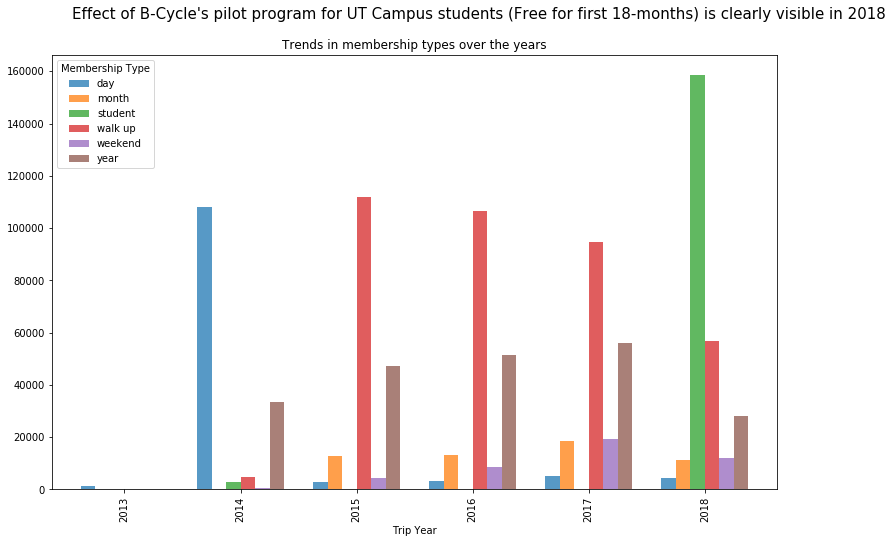

In [15]:
# To identify the top 6 membership types, apply group by and sort in descending fashion.
# Just for the above identified Top 6 membership types, group by year to count the total rides using Trip ID.
# Analysis plot has Trip Years on X-Axis, Total rides on Y-axis and pivoted by membership type.

mem_type_df = df_bike_cl.groupby(["Membership Type"],as_index=True).size()
mem_type_df = mem_type_df.sort_values(ascending=False)

#select the data for the top 6 memberships 
mem_type_year = []

for memtype in mem_type_df[:6].to_dict():
    df_temp = df_bike_cl.loc[df_bike_cl["Membership Type"]==memtype]
    mem_type_year.append(df_temp)
    
mem_type_year_df = pd.concat(mem_type_year)

# Now plot the data, since we have the top 6 membership types now group by Year and display
fig, ax = plt.subplots(figsize=(13,8))
# Without unstack, the rows are displayed seperately. 
mem_type_year_df.groupby(['Trip Year','Membership Type']).count()['Trip ID'].unstack().plot.bar(ax=ax,width = 0.75, alpha = 0.75)
plt.text(-0.45,180000,"Effect of B-Cycle's pilot program for UT Campus students (Free for first 18-months) is clearly visible in 2018",fontsize = 15)
plt.title("Trends in membership types over the years")
plt.savefig("Images/mem_type_year.png",bbox_inches = "tight")
plt.show()

### Correlation between Annual Events and Bike Rides . 
#### The Annual events being considered are SXSW and ACL. 
- Analysis during SXSW 
    - 2013 and 2018 are excluded here as:
        - SXSW was in March 2013 and B-Cycle data starts from December 2013

    - SXSW Dates 
        - SXSW 2018 - Mar  9, 2018 - Mar 18 2018
        - SXSW 2017 - Mar 10, 2017 – Mar 19, 2017
        - SXSW 2016 - Mar 11, 2016 – Mar 20, 2016
        - SXSW 2015 - Mar 13, 2015 – Mar 23, 2015
        - SXSW 2014 - Mar  7, 2014 – Mar 17, 2014


In [16]:
# For retrieving the data, apply filters on Trip Year,Trip Month and Trip Dates 
# Apply Group by on Trip ID within the filtered data frame to get the total rides

#calculate total number of rides during SXSW for year 2018
df_bike_2018 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2018), : ]
df_bike_2018_march = df_bike_2018.loc[(df_bike_2018["Trip Month"] == 3), : ]
df_bike_2018_march_SXSW = df_bike_2018_march.loc[(df_bike_2018_march["Trip Date"] >= 9)& (df_bike_2018_march["Trip Date"] <= 18), : ]
number_of_rides_SXSW_2018 = df_bike_2018_march_SXSW['Trip ID'].count()

# calculate total number of rides during SXSW for year 2017
df_bike_2017 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2017), : ]
df_bike_2017_march = df_bike_2017.loc[(df_bike_2017["Trip Month"] == 3), : ]
df_bike_2017_march_SXSW = df_bike_2017_march.loc[(df_bike_2017_march["Trip Date"] >= 10)& (df_bike_2017_march["Trip Date"] <= 19), : ]
number_of_rides_SXSW_2017 = df_bike_2017_march_SXSW['Trip ID'].count()

# calculate total number of rides during SXSW for year 2016
df_bike_2016 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2016)]
df_bike_2016_march = df_bike_2016.loc[(df_bike_2016["Trip Month"] == 3), : ]
df_bike_2016_march_SXSW = df_bike_2016_march.loc[(df_bike_2016_march["Trip Date"] >= 11)& (df_bike_2016_march["Trip Date"] <= 20), : ]
number_of_rides_SXSW_2016 = df_bike_2016_march_SXSW['Trip ID'].count()

# calculate total number of rides during SXSW for year 2015
df_bike_2015 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2015)]
df_bike_2015_march = df_bike_2015.loc[(df_bike_2015["Trip Month"] == 3), : ]
df_bike_2015_march_SXSW = df_bike_2015_march.loc[(df_bike_2015_march["Trip Date"] >= 13)& (df_bike_2015_march["Trip Date"] <= 23), : ]
number_of_rides_SXSW_2015 = df_bike_2015_march_SXSW['Trip ID'].count()

# calculate total number of rides during SXSW for year 2014
df_bike_2014 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2014)]
df_bike_2014_march = df_bike_2014.loc[(df_bike_2014["Trip Month"] == 3), : ]
df_bike_2014_march_SXSW = df_bike_2014_march.loc[(df_bike_2014_march["Trip Date"] >= 13)& (df_bike_2014_march["Trip Date"] <= 23), : ]
number_of_rides_SXSW_2014 = df_bike_2014_march_SXSW['Trip ID'].count()

print(f"Total rides during SXSW for the year 2018 : {number_of_rides_SXSW_2018 }")
print(f"Total rides during SXSW for the year 2017 : {number_of_rides_SXSW_2017 }")
print(f"Total rides during SXSW for the year 2016 : {number_of_rides_SXSW_2016 }")
print(f"Total rides during SXSW for the year 2015 : {number_of_rides_SXSW_2015 }")
print(f"Total rides during SXSW for the year 2014 : {number_of_rides_SXSW_2014 }")        

    


Total rides during SXSW for the year 2018 : 23370
Total rides during SXSW for the year 2017 : 14998
Total rides during SXSW for the year 2016 : 16929
Total rides during SXSW for the year 2015 : 21445
Total rides during SXSW for the year 2014 : 11891


## ACL Analysis

- 2013 and 2018 are excluded here as:
    - ACL was in October 2013 and B-Cycle data starts from December 2013
    - ACL has not yet happened in 2018
- ACL Dates 
    - ACL 2017 - Oct 6, 2017 – Oct 15, 2017
    - ACL 2016 -  Sep 30, 2016 – Oct 9, 2016
    - ACL 2015 - Oct 2, 2015 – Oct 11, 2015
    - ACL 2014 - 10/3-5 and 10/10-12, 2014


In [17]:
# For retrieving the data, apply filters on Trip Year,Trip Month and Trip Dates 
# Apply Group by on Trip ID within the filtered data frame to get the total rides

# Calculate number of bike rides during ACL 2017 
df_bike_2017 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2017), : ]
df_bike_2017_oct = df_bike_2017.loc[(df_bike_2017["Trip Month"] == 10), : ]
df_bike_2017_oct_acl = df_bike_2017_oct.loc[(df_bike_2017_oct["Trip Date"] >= 6)& (df_bike_2017_oct["Trip Date"] <= 15), : ]
number_of_rides_acl_2017 = df_bike_2017_oct_acl['Trip ID'].count()


# Calculate number of bike rides during ACL 2016
df_bike_2016 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2016), : ]
df_bike_2016_oct = df_bike_2016.loc[(df_bike_2016["Trip Month"] == 10), : ]
df_bike_2016_oct_acl = df_bike_2016_oct.loc[ (df_bike_2016_oct["Trip Date"] <= 9), : ]
number_of_rides_oct_acl_2016 = df_bike_2016_oct_acl['Trip ID'].count()

df_bike_2016 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2016), : ]
df_bike_2016_sept = df_bike_2016.loc[(df_bike_2016["Trip Month"] == 9), : ]
df_bike_2016_sept_acl = df_bike_2016_sept.loc[ (df_bike_2016_sept["Trip Date"] >= 30), : ]
number_of_rides_sept_acl_2016 = df_bike_2016_sept_acl['Trip ID'].count()

number_of_rides_acl_2016 = number_of_rides_oct_acl_2016 + number_of_rides_sept_acl_2016


# Calculate number of bike rides during ACL 2015
df_bike_2015 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2015), : ]
df_bike_2015_oct = df_bike_2015.loc[(df_bike_2015["Trip Month"] == 10), : ]
df_bike_2015_oct_acl = df_bike_2015_oct.loc[(df_bike_2015_oct["Trip Date"] >= 2)& (df_bike_2015_oct["Trip Date"] <= 11), : ]
number_of_rides_acl_2015 = df_bike_2015_oct_acl['Trip ID'].count()


# Calculate number of bike rides during ACL 2014
df_bike_2014 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2014), : ]
df_bike_2014_oct = df_bike_2014.loc[(df_bike_2014["Trip Month"] == 10), : ]
df_bike_2014_oct_acl = df_bike_2014_oct.loc[((df_bike_2014_oct["Trip Date"] >= 3)& (df_bike_2014_oct["Trip Date"] <= 5)) | ((df_bike_2014_oct["Trip Date"] >= 10)& (df_bike_2014_oct["Trip Date"] <= 12)), : ]
number_of_rides_acl_2014 = df_bike_2014_oct_acl['Trip ID'].count()



print(f"Number of rides during ACL for the year 2017 : {number_of_rides_acl_2017}")
print(f"Number of rides during ACL for the year 2016 : {number_of_rides_acl_2016}")
print(f"Number of rides during ACL for the year 2015 : {number_of_rides_acl_2015}")
print(f"Number of rides during ACL for the year 2014 : {number_of_rides_acl_2014}")

Number of rides during ACL for the year 2017 : 9944
Number of rides during ACL for the year 2016 : 12537
Number of rides during ACL for the year 2015 : 12440
Number of rides during ACL for the year 2014 : 9239


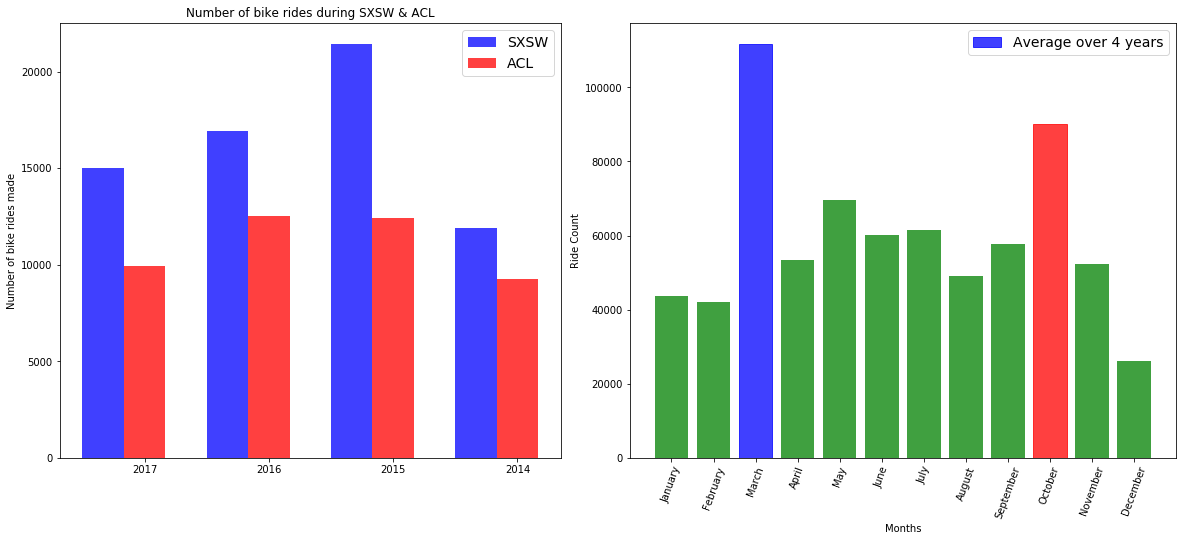

In [18]:
## plot the total rides during  ACL and SXSW from 2014 to 2017

data_SXSW = [number_of_rides_SXSW_2017, number_of_rides_SXSW_2016, number_of_rides_SXSW_2015
           , number_of_rides_SXSW_2014]
data_ACL = [number_of_rides_acl_2017, number_of_rides_acl_2016, number_of_rides_acl_2015
          , number_of_rides_acl_2014]

x_axis1 = np.arange(len(data_SXSW))
x_axis2 = np.arange(len(data_ACL))

#Calculate optimal width
width = np.min(np.diff(x_axis1))/3
df_month = df_bike_cl.loc[(df_bike_cl["Trip Year"] >= 2014) & (df_bike_cl["Trip Year"] <= 2017),:]
df_bike_month = df_month['Trip Month'].value_counts()
monthly_bike = df_bike_month.tolist()
months = df_bike_month.index

import matplotlib.gridspec as Gridspec
fig1 = plt.figure(figsize=[20,8])
gs = Gridspec.GridSpec(100,100)
ax1 = fig1.add_subplot(gs[:,0:45])
ax2 = fig1.add_subplot(gs[:,51:100])
ax1.bar(x_axis1-width, data_SXSW,width,color='blue',label='SXSW', alpha = 0.75)
ax1.bar(x_axis2, data_ACL,width,color='red',label='ACL', alpha = 0.75)
plt.setp(ax1, xticks=[0, 1, 2,3], xticklabels=["2017", "2016", "2015", "2014"])
ax1.set_title('Number of bike rides during SXSW & ACL')
ax1.set_ylabel("Number of bike rides made")
ax1.legend(loc=1, prop={'size': 14})


months_bar = ax2.bar(months, monthly_bike,color='green',label='Average over 4 years',alpha = 0.75)
months_bar[0].set_color('b')
months_bar[1].set_color('r')
ax2.set_xlabel("Months")
plt.setp(ax2, xticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], xticklabels=['January', 'February', 'March', 'April', 'May', 'June', 'July',
             'August', 'September', 'October', 'November', 'December'])

ax2.set_ylabel("Ride Count")
ax2.legend(loc=1, prop={'size': 14})
plt.setp( ax2.xaxis.get_majorticklabels(), rotation=70 )
plt.savefig("Images/SXSW-ACL.png",bbox_inches = "tight")
fig1.show()

### Correlation between Uber Ban and Bike Rides 
- Austin did not have services like Uber from  
    - May-9-2016 / May-29-2017 


In [19]:
# For retrieving the data, apply filters on Trip Year,Trip Month and Trip Dates 
# Apply Group by on Trip ID within the filtered data frame to get the total rides

# Number of bike rides during May 1st to May 29th 2017
df_bike_2017 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2017), : ]
df_bike_2017_may = df_bike_2017.loc[(df_bike_2017["Trip Month"] == 5), : ]
df_bike_2017_may_uber_ban = df_bike_2017_may.loc[(df_bike_2017_may["Trip Date"] <= 29), : ]
number_of_rides_uber_ban_2017 = df_bike_2017_may_uber_ban['Trip ID'].count()

# Number of bike rides from Jan 1st to 30th April 2017
df_bike_2017 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2017), : ]
df_bike_2017_till_april_uber_ban = df_bike_2017.loc[(df_bike_2017["Trip Month"] < 5), : ]
number_of_rides_uber_ban_2017_till_april = df_bike_2017_till_april_uber_ban['Trip ID'].count()

# Number of bike rides during June 1st to Dec 31st 2016
df_bike_2016 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2016), : ]
df_bike_2016_till_june_uber_ban = df_bike_2016.loc[(df_bike_2016["Trip Month"] >= 6) & (df_bike_2016["Trip Month"] <= 12), : ]
number_of_rides_uber_ban_2016_till_august = df_bike_2016_till_june_uber_ban['Trip ID'].count()

# To calculate the number of rides from May 9th to May 31st 2016
df_bike_2016 = df_bike_cl.loc[(df_bike_cl["Trip Year"] ==2016), : ]
df_bike_2016_may = df_bike_2016.loc[(df_bike_2016["Trip Month"] == 5), : ]
df_bike_2016_may_uber_ban = df_bike_2016_may.loc[(df_bike_2016_may["Trip Date"] >= 9), : ]
number_of_rides_uber_ban_2016 = df_bike_2016_may_uber_ban['Trip ID'].count()

number_of_rides_uber_ban = number_of_rides_uber_ban_2016 + number_of_rides_uber_ban_2017 + number_of_rides_uber_ban_2016_till_august+ number_of_rides_uber_ban_2017_till_april  

print(f" Total number of rides during Uber Ban : {number_of_rides_uber_ban}")

 Total number of rides during Uber Ban : 206052


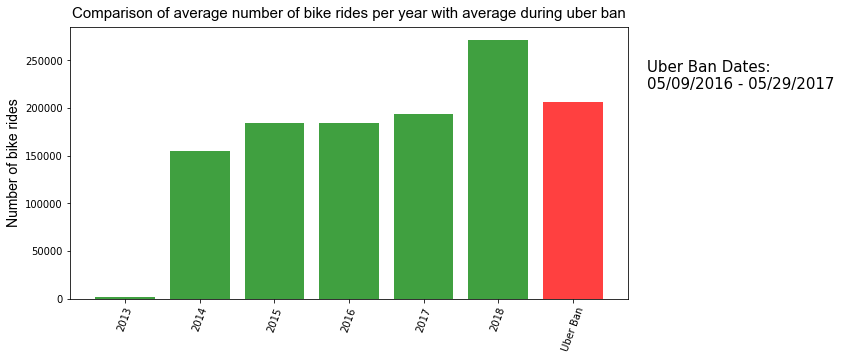

In [20]:
# Plot illustrates the comparison between Average number of rides per year and Total rides during Uber ban.
number_of_rides_per_year_list = number_of_rides_per_year.tolist()
axis_font = {'fontname':'Arial', 'size':'14'}
title_font = {'fontname':'Arial', 'size':'15', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
fig, ax = plt.subplots(figsize=(10, 5))
y_value1 = number_of_rides_per_year_list
x_axis1 = np.arange(len(number_of_rides_per_year_list))
x_axis2 = [6]
bars1 = ax.bar(x_axis1, y_value1, color='g', alpha=0.75, align="center")
bars2 = ax.bar(x_axis2, number_of_rides_uber_ban, color='r', alpha=0.75, align="center")
plt.setp(ax, xticks=[0, 1, 2, 3, 4, 5, 6], xticklabels=["2013", "2014", "2015", "2016", "2017", "2018", "Uber Ban"])
ax.set_ylabel("Number of bike rides", **axis_font)
ax.text(7,220000,s="Uber Ban Dates:\n05/09/2016 - 05/29/2017", fontsize=15)
ax.set_title('Comparison of average number of bike rides per year with average during uber ban', **title_font)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=70 )
plt.savefig("Images/Uberban.png",bbox_inches = "tight")
plt.show()